In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

from bitcoin import engine
df = engine.load_data('BTC-USD')
df.head()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
0,1520272320,11488.90,11498.86,11498.86,11488.9,1.483969,0.104927,1063075.0,0.034975,0.170432
1,1520272380,11493.10,11493.10,11493.10,11493.1,0.499374,0.104928,1063083.0,0.034975,0.170432
2,1520272440,11486.10,11493.01,11493.00,11486.1,3.876386,0.104928,1063089.0,0.034975,0.170432
3,1520272500,11486.10,11486.10,11486.10,11486.1,0.661000,0.104928,1063091.0,0.034975,0.170432
4,1520272560,11486.31,11490.50,11486.32,11487.4,0.787136,0.104928,1063095.0,0.038833,0.170432


In [2]:
df[df.isnull().any(axis=1)]

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
2072,1520397060,NaN,NaN,NaN,NaN,0.4725,0.061984,867068.0,0.018042,0.190463
2617,1520429760,NaN,NaN,10607.53,10607.53,0.9167,0.083915,579310.0,0.024163,0.187907


In [27]:
df.describe()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
count,3.838000e+03,3836.000000,3836.000000,3837.000000,3837.000000,3838.000000,3838.000000,3.838000e+03,3838.000000,3838.000000
mean,1.520388e+09,10653.615889,10660.968986,10657.393917,10657.274087,8.579793,0.072580,6.915437e+05,0.046019,0.110823
std,6.661353e+04,582.867480,578.151773,580.376708,580.385550,19.820135,0.079335,3.200481e+05,0.034998,0.053203
min,1.520272e+09,9460.000000,9533.830000,9521.400000,9500.890000,0.000886,-0.076714,3.705000e+04,-0.017144,-0.040045
25%,1.520330e+09,10034.045000,10049.725000,10048.010000,10048.010000,0.937314,0.040466,4.782200e+05,0.019430,0.062773
50%,1.520388e+09,10719.990000,10726.005000,10721.750000,10725.000000,2.660889,0.062176,7.231740e+05,0.048710,0.111881
75%,1.520445e+09,11207.000000,11215.000000,11213.010000,11213.010000,7.739334,0.082936,9.132162e+05,0.079428,0.161479
max,1.520503e+09,11643.490000,11645.360000,11644.000000,11643.990000,306.375025,0.612404,1.365095e+06,0.110500,0.211511


In [4]:
df.corr()

,time,low,high,open,close,volume,tw_sentiment,tw_followers,reddit_sentiment,google_sentiment
time,1.000000,-0.953433,-0.954892,-0.954182,-0.954031,0.199815,0.162238,-0.720250,-0.077174,-0.186286
low,-0.953433,1.000000,0.999791,0.999857,0.999908,-0.286680,-0.253627,0.727492,0.066015,0.312496
high,-0.954892,0.999791,1.000000,0.999896,0.999874,-0.272966,-0.246414,0.727767,0.064928,0.313135
open,-0.954182,0.999857,0.999896,1.000000,0.999767,-0.278068,-0.249617,0.727422,0.065486,0.312659
close,-0.954031,0.999908,0.999874,0.999767,1.000000,-0.281844,-0.250937,0.727833,0.065650,0.312464
volume,0.199815,-0.286680,-0.272966,-0.278068,-0.281844,1.000000,0.451272,-0.196843,-0.097544,-0.048991
tw_sentiment,0.162238,-0.253627,-0.246414,-0.249617,-0.250937,0.451272,1.000000,-0.252556,-0.013635,-0.008535
tw_followers,-0.720250,0.727492,0.727767,0.727422,0.727833,-0.196843,-0.252556,1.000000,0.068475,0.144754
reddit_sentiment,-0.077174,0.066015,0.064928,0.065486,0.065650,-0.097544,-0.013635,0.068475,1.000000,-0.431130
google_sentiment,-0.186286,0.312496,0.313135,0.312659,0.312464,-0.048991,-0.008535,0.144754,-0.431130,1.000000


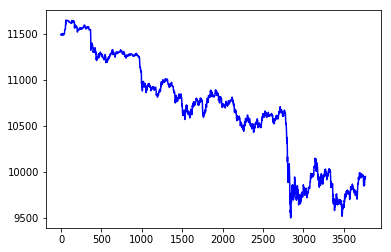

In [5]:
plt.plot(df['close'], 'b')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a658f60>,
      dtype=object)

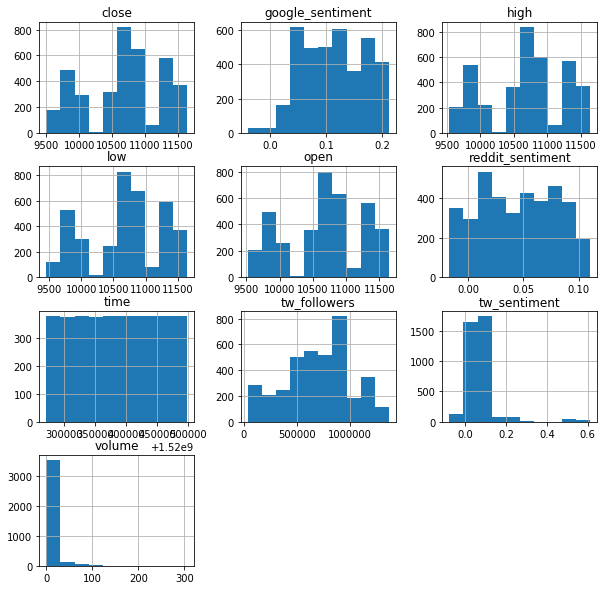

In [6]:
df.hist(figsize=(10,10))

In [7]:
X_train, X_test, y_train, y_test, scaler_x, scaler_y = engine.prepare(df)

In [8]:
model, history = engine.train(X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 200)            164800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 200)            320800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
__________

([<matplotlib.lines.Line2D at 0x11de37898>], 'g')

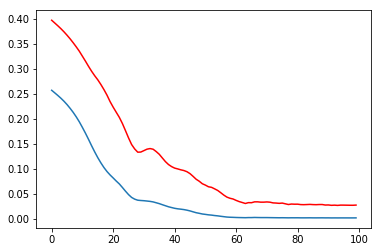

In [9]:
plt.plot(history.history['mean_absolute_error'], 'r')
plt.plot(history.history['mean_squared_error']), 'g'

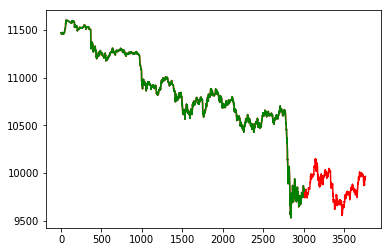

In [10]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

y_predict_train = model.predict(X_train)
y_predict_train = scaler_y.inverse_transform(y_predict_train)

y_predict_test = model.predict(X_test)
y_predict_test = scaler_y.inverse_transform(y_predict_test)

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_predict_train, y_predict_test), axis=0)

plt.plot(y, 'r')
plt.plot(y_predict_train, 'g')

In [11]:
engine.test_order_percent(df, model, scaler_x, scaler_y)

0 / 753 ---> predicted Order.UP - real Order.STAY
14 / 753 ---> predicted Order.UP - real Order.STAY
37 / 753 ---> predicted Order.DOWN - real Order.STAY
38 / 753 ---> predicted Order.UP - real Order.DOWN
41 / 753 ---> predicted Order.DOWN - real Order.UP
56 / 753 ---> predicted Order.UP - real Order.STAY
60 / 753 ---> predicted Order.UP - real Order.STAY
62 / 753 ---> predicted Order.UP - real Order.STAY
64 / 753 ---> predicted Order.UP - real Order.STAY
83 / 753 ---> predicted Order.DOWN - real Order.STAY
92 / 753 ---> predicted Order.UP - real Order.DOWN
94 / 753 ---> predicted Order.DOWN - real Order.UP
106 / 753 ---> predicted Order.UP - real Order.DOWN
111 / 753 ---> predicted Order.UP - real Order.STAY
119 / 753 ---> predicted Order.UP - real Order.STAY
121 / 753 ---> predicted Order.DOWN - real Order.STAY
122 / 753 ---> predicted Order.DOWN - real Order.STAY
126 / 753 ---> predicted Order.DOWN - real Order.UP
132 / 753 ---> predicted Order.DOWN - real Order.STAY
133 / 753 ---> 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e91ee48>]],
      dtype=object)

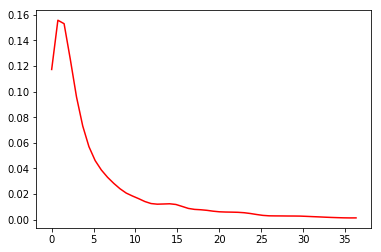

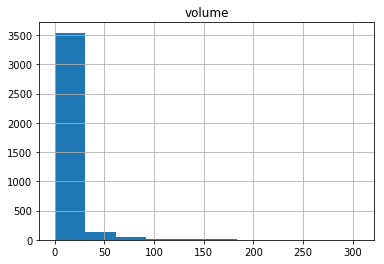

In [18]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import numpy as np

X = df['volume'].values.reshape(-1, 1)
params = {'bandwidth': np.logspace(0, df['volume'].max())}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(X)

x = np.linspace(0, np.percentile(X, 95))
log_dens = grid.best_estimator_.score_samples(x.reshape(-1, 1))

plt.plot(x, np.exp(log_dens), 'r')
df.hist(column='volume')